# Project - Telecom Churn anlysis 

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression  # for ml

In [177]:
# Problem Find out Customer Churn Analysis of Monthly Tenure contract 

In [178]:
df = pd.read_csv('C:/Users/sai/Desktop/execise/1/telecome company churn anlysis/telecome data.csv')

In [179]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA Exploratory Data Analysis

In [180]:
df.shape

(7043, 21)

In [181]:
df.duplicated().sum()

np.int64(0)

In [182]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [183]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [184]:
df.dropna(inplace = True)

In [185]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] ,errors = 'coerce')


In [186]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [187]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [188]:
cols =df.columns
for i in cols:
    print(i,df[i].unique(),'\n')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank tran

In [189]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [190]:
#EDA by Visualization 

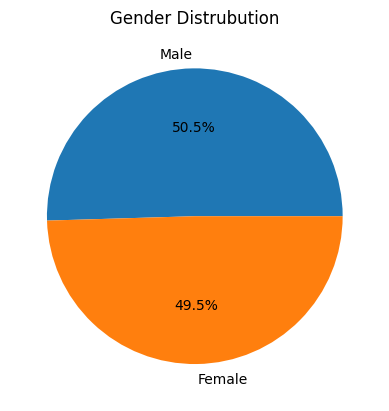

In [191]:
plt.pie(df['gender'].value_counts(),
labels =df['gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Gender Distrubution')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(x = 'tenure', data = df, ax= ax[0]).set_title('Cutomer Tenure in Months')
sns.countplot(x = 'Contract', data = df, ax= ax[1]).set_title('Contract Type')

In [199]:
# above fig represents the customers tenure with company max tenure is 70 months its indiactes the loaylty of customer with company
# short period tenure is between 1 to 10 months 
# second fig shows that customers contract with company is more in month to month  that mean customer prefer month to month bill payments.

In [200]:
# Biling and Charges

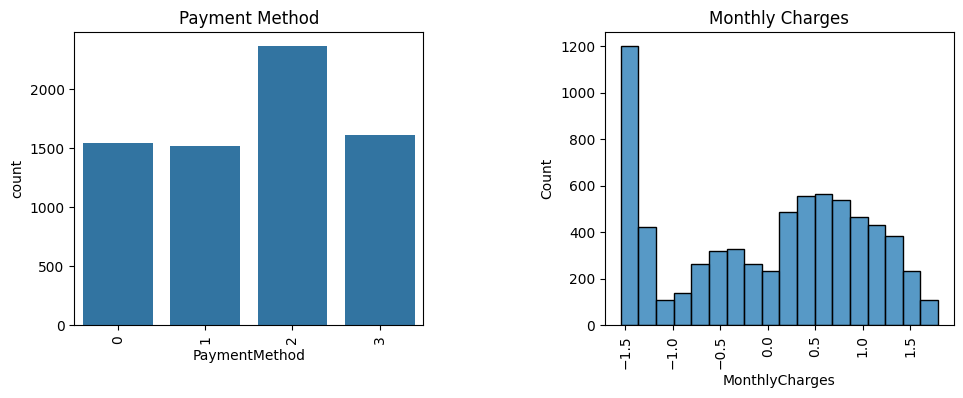

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=10.0)

# Payment Method plot
sns.countplot(x='PaymentMethod', data=df, ax=ax[0])
ax[0].set_title('Payment Method')
ax[0].xaxis.set_tick_params(rotation=90)


# Monthly Charges plot
sns.histplot(x='MonthlyCharges', data=df, ax=ax[1])
ax[1].set_title('Monthly Charges')
ax[1].xaxis.set_tick_params(rotation=90)

plt.show()



In [202]:
# above graph re[resents modes of pay bill by costomer most of the customer prefers paperless bill payment while  more than 2000 
# CUSTOMER PREFERS electronic bill payment no of customer use paper biillby emain and otehr are also huge in numbers
# maximum cust. spend about 20 dollers per month and majority of cust. spends less than 200 doller per month
# company has huge no of cust. with low  charges this means company has to focus on theese customer for churn .

Text(0.5, 1.0, 'Churn Count')

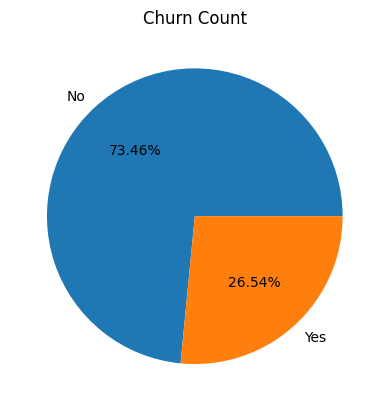

In [203]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.2f%%')
plt.title('Churn Count')

In [204]:
# above fig shows only 26 % customer churned ( left company service) that means company is good to keep majority of its customer

Text(0.5, 1.0, 'Contract Type and Churn')

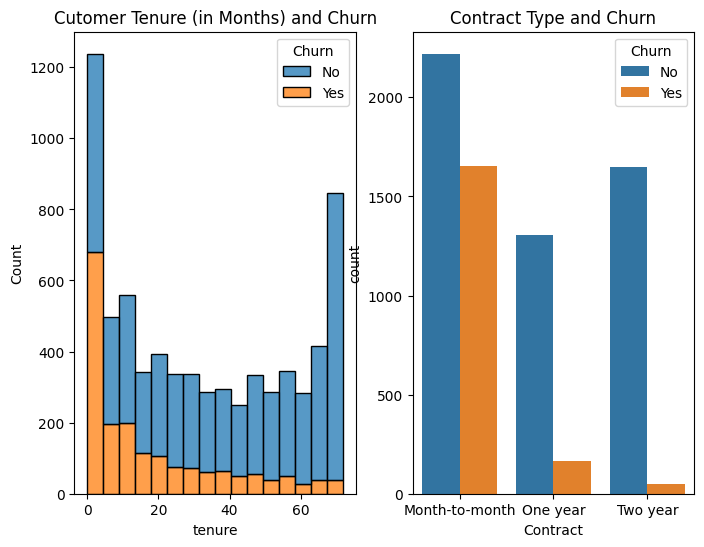

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')

In [206]:
# Looks like the customer tenure and contract has a inverse relation.
# The customers with shorter tenure or tenure less than 5 months have higher churn count.
# The churn count decreases with increase in tenure. 
#Moreover, the customers with month-to-month contract have higher churn count as compared to those 
#with one or two year contract which also proves that customer who have longer contract with the company have lower churn count.

In [207]:
#Columns for outlier removal
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Using IQR method to remove outliers
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Removing the outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [208]:
from sklearn.preprocessing import LabelEncoder

#columns for label encoding

cols = df.columns[df.dtypes=='object']

#Label encoder object

le =LabelEncoder()

#Label encoding the columns

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i,df[i].unique(),'\n')

customerID [5375 3962 2564 ... 3367 5934 2226] 

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



# Train model and ML

In [209]:
# Train Test Split

In [210]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='Churn'),df
                                                 ['Churn'],test_size=0.2,random_state=42)

In [211]:
# Model Building¶
#i will  use the following models to predict the customer churn :
#1. Decision Tree Classifier
#2. Random Forest Classifier
#3 .K nearest Nearest Neighbors Classifier

# Classifier Testing 

In [212]:
#Decision Tree Classifier

In [213]:
from sklearn.tree import DecisionTreeClassifier

## decision Tree Classifier Object

dtree = DecisionTreeClassifier()

In [214]:
from sklearn.preprocessing import StandardScaler

#standardizing the data

sc = StandardScaler()

df[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [215]:
# K nearest Neighbours clasiifier

In [216]:
# hyper paramter Tunning using GridSearchCV

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Decision Tree object
dtree = DecisionTreeClassifier()

# Parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42]
}

# Grid Search Object 
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Training Data Grid Search 
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [218]:
#Decision Tree Classifier Object with best parameters
dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)

#Fitting the data
dtree.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))

#Predicting the values
d_pred = dtree.predict(X_test)

Training Accuracy:  0.8081292154774583


In [219]:
# Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [250]:
#Random Forest Classifier Object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42)

#Fitting the data
rfc.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#Predicting the values
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8356407525736599


In [267]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [274]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)    
X_test_imputed = imputer.transform(X_test)


knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')
knn.fit(X_train_imputed, y_train)

# Accuracy
print('Training Accuracy:', knn.score(X_train_imputed, y_train))

# Predict
k_pred = knn.predict(X_test_imputed)

Training Accuracy: 0.7802626908058218


# # Model Evalution

In [ ]:

#Confusion Matrix Heatmap

Text(0.5, 1.0, 'KNN Confusion Matrix')

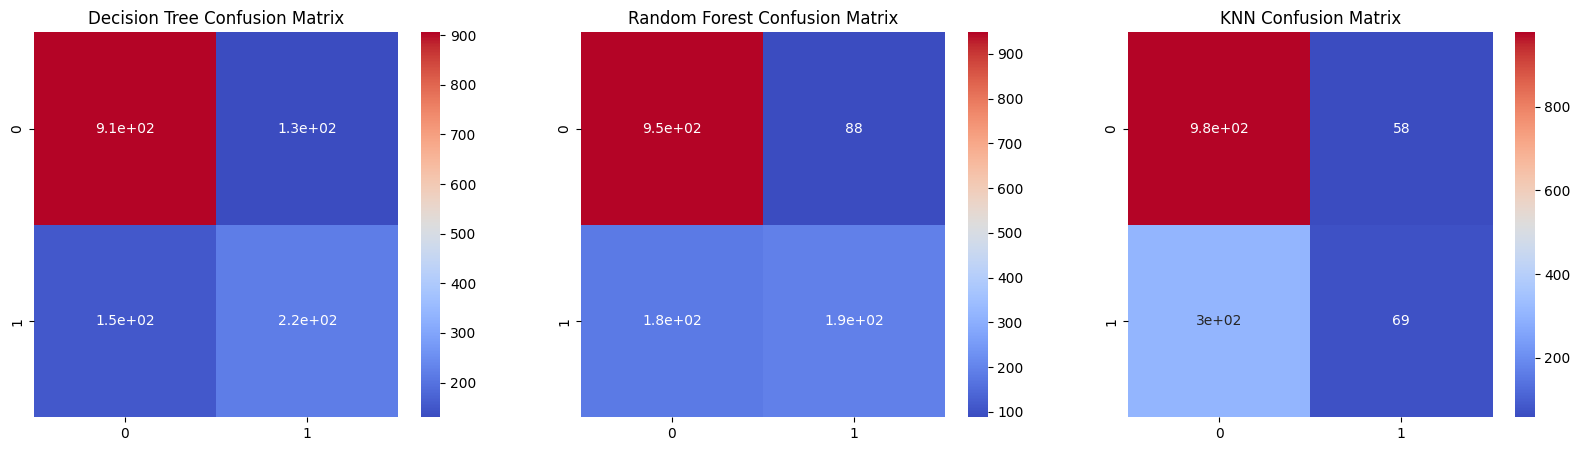

In [276]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

#Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[0], cmap='coolwarm').set_title('Decision Tree Confusion Matrix')

#Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[1], cmap='coolwarm').set_title('Random Forest Confusion Matrix')

#KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, k_pred), annot=True, ax=ax[2], cmap='coolwarm').set_title('KNN Confusion Matrix')


In [ ]:
#The confusion matrix heatmaps visulaizes the true positive and true negative results from the machine learning model.
# Here, in the above confusion matrix, when see that the Random Forest Classifier has the highest true positive and true negative results,
# with considerbly less false positive and false negative results.
# Therefore, the Random Forest Classifier is the best model for predicting the customer churn.

In [ ]:
# DIstrubution Plot

<Axes: title={'center': 'KNN'}, xlabel='Churn', ylabel='Density'>

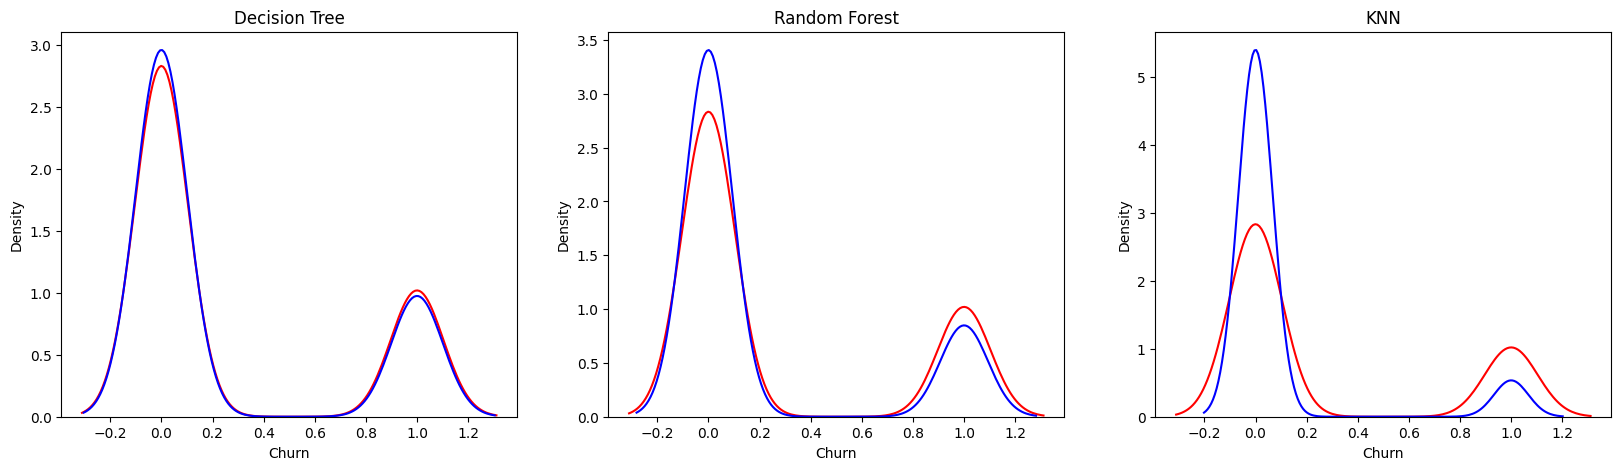

In [277]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

#Decision Tree 

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Decision Tree')
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])

#Random Forest
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Random Forest')
sns.distplot(r_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])

#KNN
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2]).set_title('KNN')
sns.distplot(k_pred, hist=False, color="b", label="Fitted Values" , ax=ax[2])


In [ ]:
 # classifiacation Report

In [278]:
from sklearn.metrics import classification_report

print('Decision Tree Classification Report: \n', classification_report(y_test, d_pred))

print('Random Forest Classification Report: \n', classification_report(y_test, r_pred))

print('KNN Classification Report: \n', classification_report(y_test, k_pred))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.63      0.59      0.61       373

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      1036
           1       0.54      0.18      0.28       373

    accuracy                           0.74      1409
   macro avg       0.